# Work in Progress

### End-to-end a pretrained/prebuilt ImageNet model from a github repo into `scivision`

Provides an example of end-to-end pipeling from the following test repo as a scivision Model:
https://github.com/quantumjot/scivision-test-plugin
   
The code calls the repo from the catalog and run end-to-end example using ImageNet pretrained/prebuilt models.

## Load scivision

In [29]:
from scivision.io import load_pretrained_model
from scivision.catalog import catalog

## Catalog

In [31]:
# load the database and query a certain model

query_dict = {'model': 'https://github.com/quantumjot/scivision-test-plugin'}

queryO = catalog.query(query_dict)
queryO

[{'task': 'object-detection',
  'model': 'https://github.com/quantumjot/scivision-test-plugin',
  'github_branch': 'master',
  'language': 'Python3',
  'data_format': 'jpg',
  'pretrained': 'yes',
  'labels_required': 'no',
  'institution_model': 'alan-turing-institute',
  'tags_model': ['dummy'],
  'domain': ['multispectral', 'hyperspectral'],
  'datasource': 'https://gitlab.au.dk/AUENG-Vision/OPPD/-/archive/master/OPPD-master.zip?path=DATA/images_plants/1COMF',
  'format': 'jpg',
  'labels': 'yes',
  'institution_data': 'Aarhus University',
  'tags_data': ['help-needed',
   '2D',
   'plant-phenotyping',
   'agriculture',
   'climate-change-and-agriculture']},
 {'task': 'object-detection',
  'model': 'https://github.com/quantumjot/scivision-test-plugin',
  'github_branch': 'master',
  'language': 'Python3',
  'data_format': 'jpg',
  'pretrained': 'yes',
  'labels_required': 'no',
  'institution_model': 'alan-turing-institute',
  'tags_model': ['dummy'],
  'domain': ['computer-vision']

In [32]:
# let's subset the second entry, a baby koala

target = queryO[1]
target

{'task': 'object-detection',
 'model': 'https://github.com/quantumjot/scivision-test-plugin',
 'github_branch': 'master',
 'language': 'Python3',
 'data_format': 'jpg',
 'pretrained': 'yes',
 'labels_required': 'no',
 'institution_model': 'alan-turing-institute',
 'tags_model': ['dummy'],
 'domain': ['computer-vision'],
 'datasource': 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Cutest_Koala.jpg/262px-Cutest_Koala.jpg',
 'format': 'jpg',
 'labels': 'yes',
 'institution_data': 'Wikipedia by Erik Veland',
 'tags_data': ['demo']}

## Model settings and config

In [33]:
# define settings
config_path = target['model'] + "/" + '.scivision-config_imagenet.yaml'
inputs = target['datasource']

In [34]:
model = load_pretrained_model(config_path, allow_install=True)

In [35]:
# let's explore the model object
model

scivision.PretrainedModel( 
  module='scivision_test_plugin', 
  model='ImageNetModel', 
  source='https://github.com/quantumjot/scivision-test-plugin.git' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "image: numpy.ndarray">)' 
)

## Load input image

In [37]:
# libraries
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.applications.imagenet_utils import decode_predictions

import matplotlib.pyplot as plt

In [38]:
x = imread(inputs)
X = resize(x, (224, 224)) * 255  # cast back to 0-255 range

## Model predictions

In [39]:
y = model.predict(X)

2021-09-17 15:53:24.418530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [40]:
def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

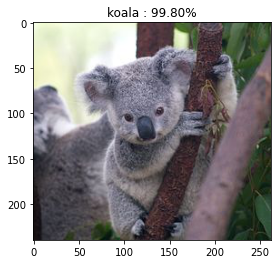

In [41]:
plt.figure()
plt.imshow(x)
_, image_class, class_confidence = get_imagenet_label(y)
plt.title("{} : {:.2f}%".format(image_class, class_confidence * 100))
plt.show()